In [36]:
import pandas as pd
# import train test split
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [37]:
df["engine"]=df["engine"].str.split(" ", expand=True)[0]
df["max_power"]=df["max_power"].str.split(" ", expand=True)[0]
df["mileage"]=df["mileage"].str.split(" ", expand=True)[0]

In [38]:
len(df["name"].unique())

2058

In [39]:
df["brand"]=df["name"].str.split(" ", expand=True)[0]
df["model"]=df["name"].str.split(" ", expand=True)[1]

In [40]:
df = df.drop("name", axis=1)
df = df.drop("torque", axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
 11  brand          8128 non-null   object 
 12  model          8128 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [42]:
# convert mileage, engine, max_power to float
df["mileage"] = df["mileage"].astype(float)
df["engine"] = df["engine"].astype(float)

In [43]:
# replace empty string with mean of max_power
df["max_power"] = df["max_power"].replace("", 100)
df["max_power"] = df["max_power"].astype(float)

In [44]:
# fill missing values
df["engine"] = df["engine"].fillna(df["engine"].mean())
df["max_power"] = df["max_power"].fillna(df["max_power"].mean())
df["mileage"] = df["mileage"].fillna(df["mileage"].mean())
df["seats"] = df["seats"].fillna(df["seats"].mean())

In [45]:
import numpy as np
y = df["selling_price"]
y = np.log(y)
df = df.drop("selling_price", axis=1)

In [46]:
df.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,model
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          8128 non-null   int64  
 1   km_driven     8128 non-null   int64  
 2   fuel          8128 non-null   object 
 3   seller_type   8128 non-null   object 
 4   transmission  8128 non-null   object 
 5   owner         8128 non-null   object 
 6   mileage       8128 non-null   float64
 7   engine        8128 non-null   float64
 8   max_power     8128 non-null   float64
 9   seats         8128 non-null   float64
 10  brand         8128 non-null   object 
 11  model         8128 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 762.1+ KB


In [48]:
# convert categorical data to numerical data with sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = encoder.fit_transform(df[col])
df.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,model
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,20,161
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,27,135
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,10,36
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,11,206
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,20,161


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495710,-0.440324,0.272216,0.814603
1,0.048464,0.887411,-0.889115,0.277607,0.385158,0.970600,0.432289,0.079227,0.339576,-0.440324,1.222516,0.413031
2,-1.929775,1.241098,1.106392,0.277607,0.385158,2.607839,-0.431678,0.077215,-0.382528,-0.440324,-1.085356,-1.116034
3,-0.940656,1.011202,-0.889115,0.277607,0.385158,-0.666639,0.899435,-0.126009,-0.042981,-0.440324,-0.949599,1.509633
4,-1.682495,0.887411,1.106392,0.277607,0.385158,-0.666639,-0.833524,-0.323198,-0.093913,-0.440324,0.272216,0.814603


In [50]:
#df = df[:1000]
#y = y[:1000]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
x_train = torch.tensor(x_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test= torch.tensor(y_test.values, dtype=torch.float)

In [52]:
class MySimpleNN(torch.nn.Module):   # MySimpleNN erbt von torch.nn.Module

    # Konstruktor
    def __init__(self, input_size=10, hidden_size=(10, 20, 10), output_size=1):
        # Aufruf des Superkonstruktors von torch.nn.Module
        super(MySimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size[0])
        self.fc2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = torch.nn.Linear(hidden_size[1], hidden_size[2])
        self.fc4 = torch.nn.Linear(hidden_size[2], output_size)

        # Batch Normalization
        self.bn1 = torch.nn.BatchNorm1d(hidden_size[0])
        self.bn2 = torch.nn.BatchNorm1d(hidden_size[1])
        self.bn3 = torch.nn.BatchNorm1d(hidden_size[2])

    # forward Methode -> Forward Propagation
    # wenn ich später ein Objekt von MySimpleNN erzeuge, dann kann ich
    # dieses Objekt mit einem Tensor aufrufen, dann wird die forward Methode
    # aufgerufen. z.B. model(x_train)
    def forward(self, xb):   # xb steht für eine Batch von X-Werten
        #print("xb", xb.shape)
        z2 = self.fc1(xb)  # dahinter steckt x@w1 + b1
        a2 = torch.relu(z2)    # alle negativen Werte werden auf 0 gesetzt, der Rest bleibt
        #print("a2", a2.shape)
        a2_bn = self.bn1(a2) # Normalisierung der Werte auf den Neuronen
        #print("a2_bn", a2_bn.shape)
        z3 = self.fc2(a2_bn) # dahinter steckt a2@w2 + b2
        #print("z3", z3.shape)
        a3 = torch.relu(z3)
        #print("a3", a3.shape)
        a3_bn = self.bn2(a3)
        #print("a3_bn", a3_bn.shape)
        z4 = self.fc3(a3_bn)
        #print("z4", z4.shape)
        a4 = torch.relu(z4)
        #print("a4", a4.shape)
        a4_bn = self.bn3(a4)
        #print("a4_bn", a4_bn.shape)
        y_hat = torch.relu(self.fc4(a4_bn))
        #print("y_hat", y_hat.shape)
        return y_hat

In [53]:
def get_batch(x, y, batch_size):
    # z.B. range(0, 10, 3) --> 0, 3, 6, 9
    # range(start, stop, step)
    for i in range(0, len(x), batch_size):
        # yield: gibt den Wert zurück, aber merkt sich den aktuellen Zustand
        yield x[i:i+batch_size], y[i:i+batch_size]

In [58]:
xb, yb = next(get_batch(x_train, y_train, batch_size=100))
model = MySimpleNN(input_size=12, hidden_size=(30, 40, 10), output_size=1)
print(model(xb).shape)

torch.Size([100, 1])


/home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([102])) that is different to the input size (torch.Size([102, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


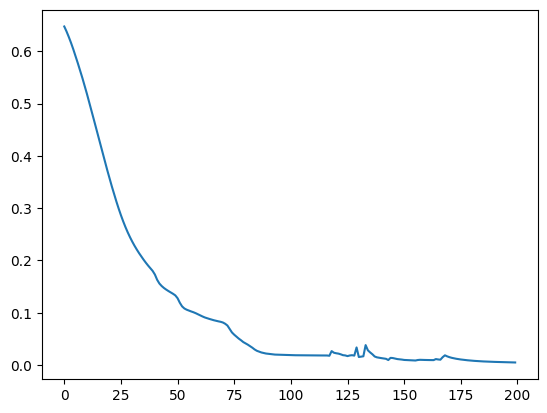

In [59]:
# eigenes Modell wird erstellt
model = MySimpleNN(input_size=12, hidden_size=(30, 40, 10), output_size=1)
lr=0.0001
# trainiere immer mit 10 Datensätzen auf einmal
batch_size=256

# loss function
# Mean Squared Error
# die Lossfunction von Pytorch müssen erstmal erstellt werden mit ()
loss_fn = torch.nn.MSELoss()


def train(xb, yb):
    y_hat=model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    with torch.no_grad():
        # Iteration über alle Parameter im Modell
        for param in model.parameters():
            # Backpropagation, d.h. die Veränderung der Gewichte in Abhängigkeit der Ableitung
            param -= lr * param.grad
        # Alle Gradients im Modell werden auf 0 gesetzt
        model.zero_grad()
    return loss.item()

losses=[]
# import tqdm notebook
for epoch in range(200):
    loss_sum=0
    # Iteration über alle Batches
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    losses.append(loss_sum/len(x_train))

#plot
import matplotlib.pyplot as plt
plt.plot(losses)

In [60]:
xb, yb = next(get_batch(x_train, y_train, batch_size=100))
y_preds=model(xb)
for i in range(10):
    print("Vorhersage:", np.exp(y_preds[i].item()), "Tatsächlicher Wert:", np.exp(yb[i].item()))


Vorhersage: 293861.8785833204 Tatsächlicher Wert: 519999.9011449155
Vorhersage: 305307.5934033847 Tatsächlicher Wert: 300000.0539133862
Vorhersage: 1623894.4300158136 Tatsächlicher Wert: 379999.8510890395
Vorhersage: 224111.41719029698 Tatsächlicher Wert: 530000.1620312294
Vorhersage: 220845.51227853497 Tatsächlicher Wert: 334999.9565656248
Vorhersage: 209458.9583551488 Tatsächlicher Wert: 79999.97254228884
Vorhersage: 748502.8338398698 Tatsächlicher Wert: 399999.87473975326
Vorhersage: 1635749.1702204123 Tatsächlicher Wert: 1000000.1918526388
Vorhersage: 639619.953032633 Tatsächlicher Wert: 2174999.154171467
Vorhersage: 203079.06599651216 Tatsächlicher Wert: 499999.8565554246


In [61]:
# testen des Modells
x_test_preds=model(x_test)

# abweichung der Vorhersage vom tatsächlichen Wert
diff=torch.abs(x_test_preds-y_test)
print("Durchschnittliche Abweichung:", torch.mean(diff).item())


Durchschnittliche Abweichung: 0.7384964227676392


Bad pipe message: %s [b'\xb3uA\xfe\x9c\xf8\x96amjZ\xa4\xa2f6\xbb\xee\x07 \x14\xa7\x06\x81+\x85f\xcb\x8e\xaf\x81z\xeb{\x93\xa1\xff+3\xfb\x0b\xd4\x8eo\xb2\x00ep\x95-9q\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04', b'\x08\x06\x04\x01\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 q\xb3\x93\x8f\x1a\xed\x99\x9f\x13bw]w|U\xb5\xf5%\x87\x9e?\xfb']
Bad pipe message: %s [b"\x1f\xf0\xdc\xe1\x83\xa60\txy\x0fSN\xb7\xba\xa4\xcc\xa2\x00\x00\xf4\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00\xa7\x00m\x00:\x00\x89\xc02\xc0.\xc0*\xc0&\xc0\x0f\xc0\x05\x00\x9d\x00=\x0